# Final Project - Clustering the Countries by using K-Means for HELP International

<b>Objective:</b>

Untuk mengkategorikan negara menggunakan faktor sosial ekonomi dan kesehatan yang menentukan pembangunan negara secara keseluruhan.


<b>Tentang Organisasi:</b>

HELP International adalah LSM kemanusiaan internasional yang berkomitmen untuk memerangi kemiskinan dan menyediakan fasilitas dan bantuan dasar bagi masyarakat di negara-negara terbelakang saat terjadi bencana dan bencana alam.

 

<b>Permasalahan:</b>

HELP International telah berhasil mengumpulkan sekitar $ 10 juta. Saat ini, CEO LSM perlu memutuskan bagaimana menggunakan uang ini secara strategis dan efektif. Jadi, CEO harus mengambil keputusan untuk memilih negara yang paling membutuhkan bantuan. Oleh karena itu, Tugas teman-teman  adalah mengkategorikan negara menggunakan beberapa faktor sosial ekonomi dan kesehatan yang menentukan perkembangan negara secara keseluruhan. Kemudian kalian perlu menyarankan negara mana saja  yang paling perlu menjadi fokus CEO.

 

Penjelasan kolom fitur:

* Negara : Nama negara
* Kematian_anak: Kematian anak di bawah usia 5 tahun per 1000 kelahiran
* Ekspor : Ekspor barang dan jasa perkapita
* Kesehatan: Total pengeluaran kesehatan perkapita
* Impor: Impor barang dan jasa perkapita
* Pendapatan: Penghasilan bersih perorang
* Inflasi: Pengukuran tingkat pertumbuhan tahunan dari Total GDP 
* Harapan_hidup: Jumlah tahun rata-rata seorang anak yang baru lahir akan hidup jika pola kematian saat ini tetap sama
* Jumlah_fertiliti: Jumlah anak yang akan lahir dari setiap wanita jika tingkat kesuburan usia saat ini tetap sama
* GDPperkapita: GDP per kapita. Dihitung sebagai Total GDP dibagi dengan total populasi. 

## Reading and Understanding Data

### Import Libraries

In [666]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### Reading Data

In [667]:
filepath = 'Data_Negara_HELP.csv'
country_df = pd.read_csv(filepath)

### Understanding Data

In [668]:
country_df.shape

(167, 10)

In [669]:
# Melihat kolom apa saja yang ada
country_df.columns

Index(['Negara', 'Kematian_anak', 'Ekspor', 'Kesehatan', 'Impor', 'Pendapatan',
       'Inflasi', 'Harapan_hidup', 'Jumlah_fertiliti', 'GDPperkapita'],
      dtype='object')

In [670]:
# Melihat 5 data teratas
country_df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [671]:
# melihat informasi data
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [672]:
# melihat statistik deskriptif data
country_df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Exploratory Data Analysis

### Data Cleaning

In [673]:
# melihat apakah ada nilai yang hilang dalam data
country_df.isnull().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

### Univariate Analysis

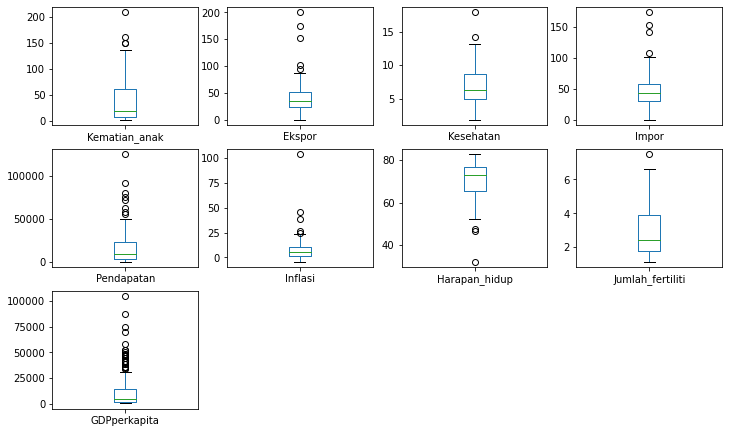

In [674]:
# melihat outlier tiap variable
country_df.plot(kind='box', subplots=True, layout=(4,4), figsize=(12,10))
plt.savefig('cekOutliersPadaTiapKolom.png')
plt.show()

### Bivariate Analysis

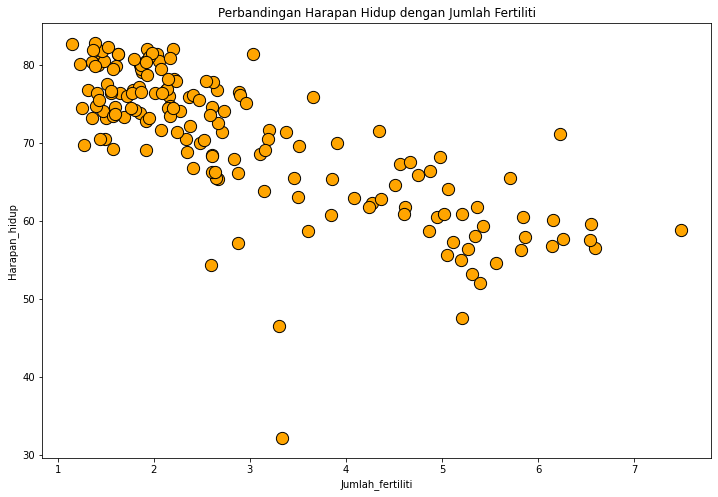

In [675]:
plt.figure(figsize=(12,8))

sns.scatterplot(
    x=country_df['Jumlah_fertiliti'], 
    y=country_df['Harapan_hidup'], 
    s=150,
    color='orange',
    edgecolor='black'
)

plt.title('Perbandingan Harapan Hidup dengan Jumlah Fertiliti')
plt.savefig('ScatterPlot.png')
plt.show()

### Multivariate Analysis

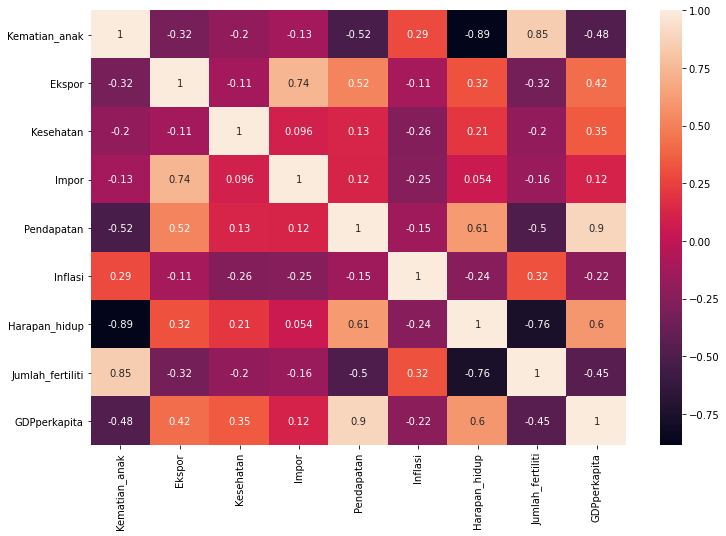

In [676]:
plt.figure(figsize=(12,8))
sns.heatmap(data=country_df.corr(), annot=True)
plt.savefig('Heatmap.png')
plt.show()

# Analisa 1: Jumlah fertiliti dan Harapan Hidup

## Outliers Treatment

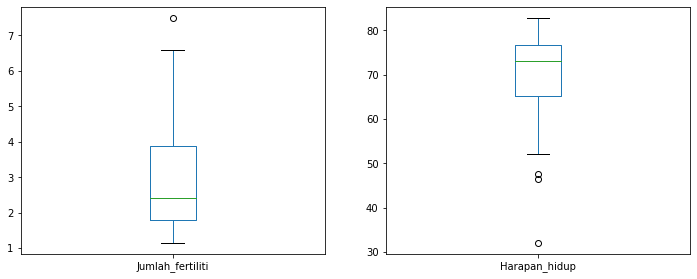

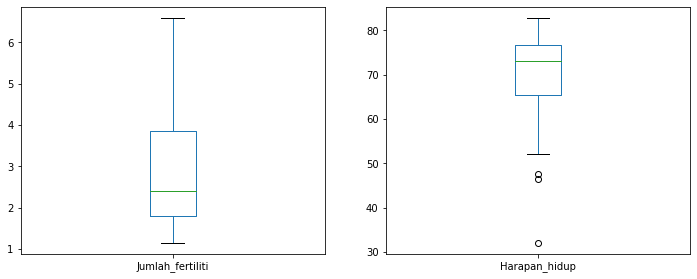

In [677]:
data = country_df[['Jumlah_fertiliti', 'Harapan_hidup']]
data.plot(kind='box', subplots=True, layout=(2,2), figsize=(12,10))
plt.show()

def remove_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_final = df[~(df>(Q1-(1.5*IQR))) | (df<(Q3+(1.5*IQR)))]
    
    return df_final

df = remove_outlier(country_df[['Jumlah_fertiliti', 'Harapan_hidup']])

df.dropna(axis=0, inplace=True)
df.plot(kind='box', subplots=True, layout=(2,2), figsize=(12,10))
plt.savefig('beforeAfterOutliers_Ferti_HarapanHidup.png')
plt.show()

## Scaling Data

In [678]:
sc = StandardScaler()
df_std1 = sc.fit_transform(df)

## Creating KMeans Clustering and Visualizing Clustered Formed

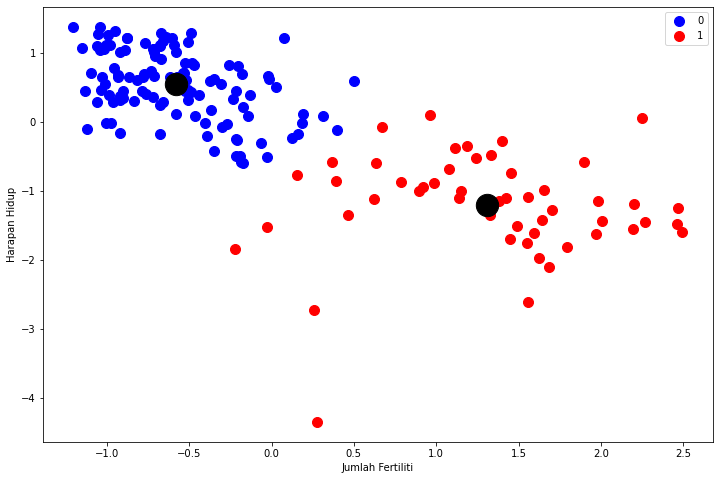

In [679]:
kmeans1 = KMeans(n_clusters=2, random_state=42).fit(df_std1)
labels1 = kmeans1.labels_
centers = kmeans1.cluster_centers_

new_df1 = pd.DataFrame(data = df_std1, columns = ['Jumlah_fertiliti', 'Harapan_hidup'])
new_df1['label_kmeans1'] = labels1

plt.figure(figsize=(12,8))
plt.scatter(new_df1['Jumlah_fertiliti'][new_df1.label_kmeans1 == 0], new_df1['Harapan_hidup'][new_df1.label_kmeans1 == 0],c = 'blue',s = 100,label = 0,edgecolors = 'blue')
plt.scatter(new_df1['Jumlah_fertiliti'][new_df1.label_kmeans1 == 1], new_df1['Harapan_hidup'][new_df1.label_kmeans1 == 1],c = 'red',s = 100,label = 1,edgecolors = 'red')

plt.scatter(centers[:, 0],centers[:, 1],c = 'black',s = 500)


plt.xlabel('Jumlah Fertiliti')
plt.ylabel('Harapan Hidup')
plt.legend()
plt.show()

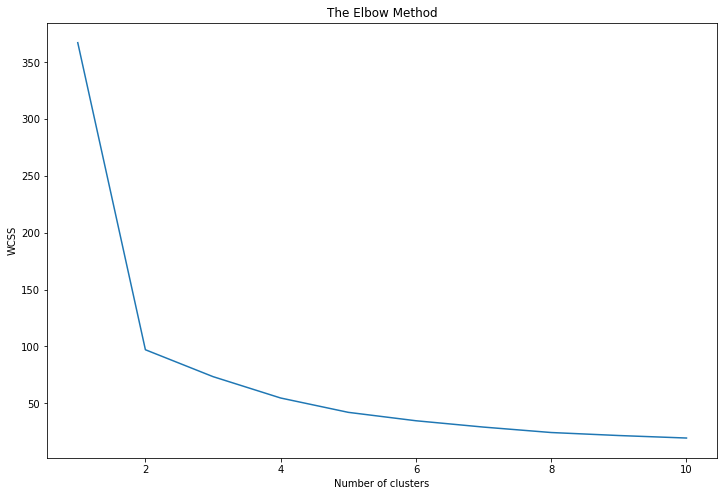

In [680]:
# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(new_df1)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(12,8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

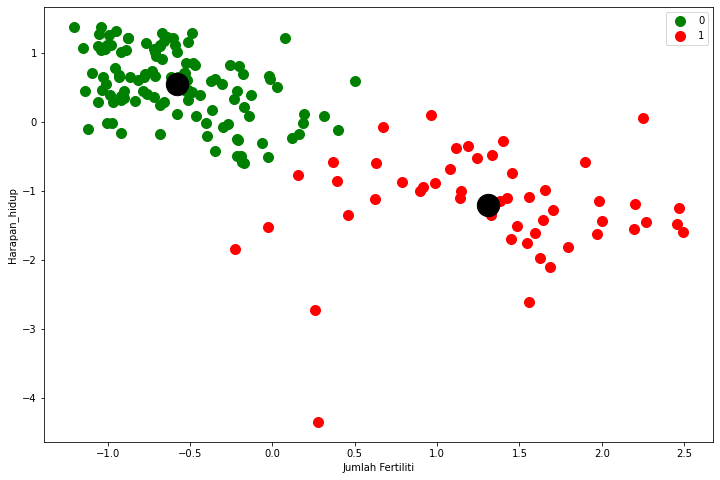

In [681]:
# clustering using n_clusters = 2
kmeans2 = KMeans(n_clusters=2, init='k-means++', random_state=42).fit(df_std1)
labels2 = kmeans2.labels_
centers = kmeans2.cluster_centers_
new_df1['label_kmeans2'] = labels2

plt.figure(figsize=(12,8))
plt.scatter(new_df1['Jumlah_fertiliti'][new_df1.label_kmeans2 == 0], new_df1['Harapan_hidup'][new_df1.label_kmeans2 == 0], c = 'green', s = 100, label = 0, edgecolors = 'green')

plt.scatter(new_df1['Jumlah_fertiliti'][new_df1.label_kmeans2 == 1], new_df1['Harapan_hidup'][new_df1.label_kmeans2 == 1], c = 'red', s = 100, label = 1, edgecolors = 'red')



plt.scatter(
    centers[:, 0],
    centers[:, 1],
    c = 'black',
    s = 500
)

plt.xlabel('Jumlah Fertiliti')
plt.ylabel('Harapan_hidup')
plt.legend()
plt.savefig('analisis1.png')
plt.show()

In [682]:
from sklearn.metrics import silhouette_score

print(silhouette_score(df_std1, labels= labels1))
print(silhouette_score(df_std1, labels= labels2))

0.635271826088425
0.635271826088425


## Report Countries

In [683]:
new_df1['label2_kmeans'] = labels2
country_df['K_means_labels'] = pd.Series(labels2).astype('object')

top5_countries = country_df[country_df['K_means_labels'] == 1]
top5_countries = top5_countries.sort_values(by=['Harapan_hidup', 'Jumlah_fertiliti'],ascending=True)[:5].reset_index(drop=True)
top5_countries[['Negara', 'Harapan_hidup']]

,Negara,Harapan_hidup
0,Haiti,32.1
1,Lesotho,46.5
2,Central African Republic,47.5
3,Malawi,53.1
4,Mozambique,54.5


# Analisa 2: Kematian Anak dan Harapan Hidup

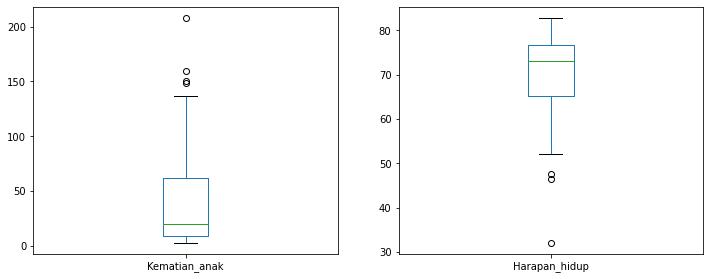

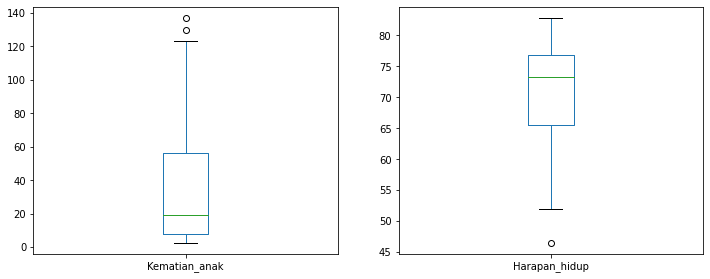

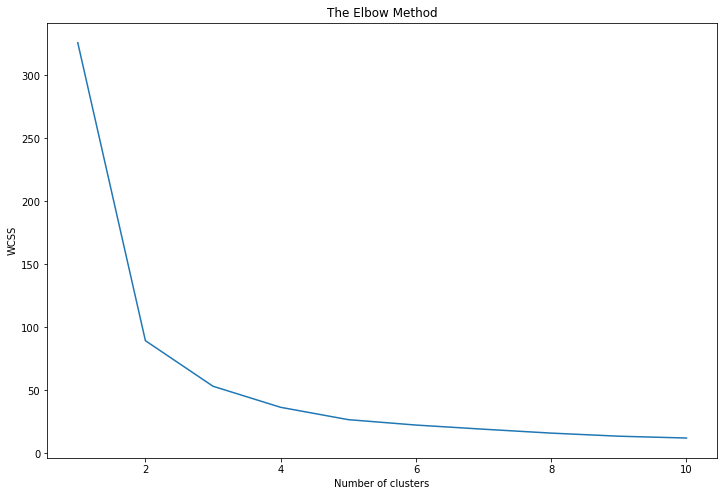

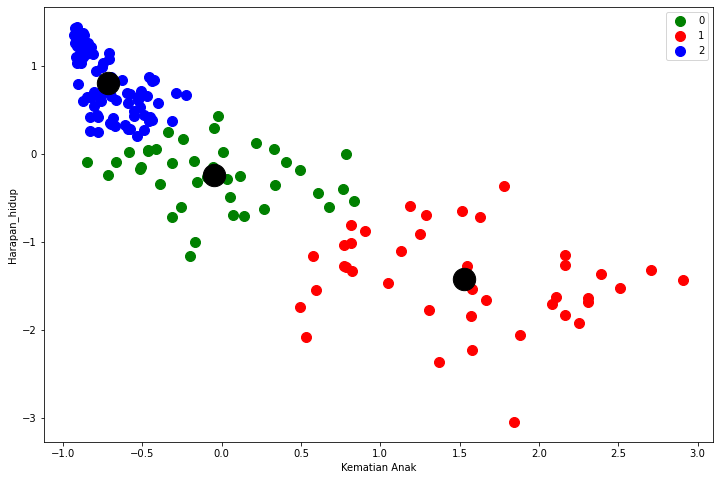

In [684]:
data = country_df[['Kematian_anak', 'Harapan_hidup']]
data.plot(kind='box', subplots=True, layout=(2,2), figsize=(12,10))
plt.show()

def remove_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_final = df[~(df>(Q1-(1.5*IQR))) | (df<(Q3+(1.5*IQR)))]
    
    return df_final

df = remove_outlier(country_df[['Kematian_anak', 'Harapan_hidup']])

df.dropna(axis=0, inplace=True)
df.plot(kind='box', subplots=True, layout=(2,2), figsize=(12,10))
plt.show()

# Scaling Data
sc = StandardScaler()
df_std2 = sc.fit_transform(df)

# KMeans proses
new_df2 = pd.DataFrame(data = df_std2, columns = ['Kematian_anak', 'Harapan_hidup'])

# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(new_df2)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(12,8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# clustering using n_clusters = 3
kmeans2 = KMeans(n_clusters=3, init='k-means++', random_state=42).fit(df_std2)
labels2 = kmeans2.labels_
centers = kmeans2.cluster_centers_
new_df2['label_kmeans2'] = labels2

plt.figure(figsize=(12,8))
plt.scatter(new_df2['Kematian_anak'][new_df2.label_kmeans2 == 0], new_df2['Harapan_hidup'][new_df2.label_kmeans2 == 0], c = 'green', s = 100, label = 0, edgecolors = 'green')
plt.scatter(new_df2['Kematian_anak'][new_df2.label_kmeans2 == 1], new_df2['Harapan_hidup'][new_df2.label_kmeans2 == 1], c = 'red', s = 100, label = 1, edgecolors = 'red')
plt.scatter(new_df2['Kematian_anak'][new_df2.label_kmeans2 == 2], new_df2['Harapan_hidup'][new_df2.label_kmeans2 == 2], c = 'blue', s = 100, label = 2, edgecolors = 'blue')



plt.scatter(
    centers[:, 0],
    centers[:, 1],
    c = 'black',
    s = 500
)

plt.xlabel('Kematian Anak')
plt.ylabel('Harapan_hidup')
plt.legend()
plt.savefig('analisis2.png')
plt.show()

In [685]:
from sklearn.metrics import silhouette_score

print(silhouette_score(df_std2, labels= labels2))

new_df2['label2_kmeans'] = labels2
country_df['K_means_labels'] = pd.Series(labels2).astype('object')

top5_countries = country_df[country_df['K_means_labels'] == 1]
top5_countries = top5_countries.sort_values(by=['Kematian_anak'],ascending=False)[:5].reset_index(drop=True)
top5_countries[['Negara', 'Kematian_anak']]

0.5078271946924935


,Negara,Kematian_anak
0,Nigeria,130.0
1,Angola,119.0
2,Burkina Faso,116.0
3,Benin,111.0
4,Cameroon,108.0


# Analisa 3: GDPperkapita dan Harapan Hidup

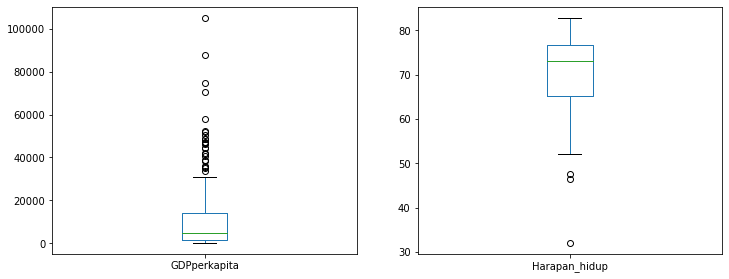

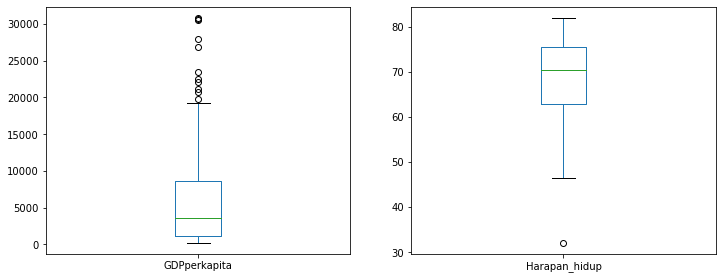

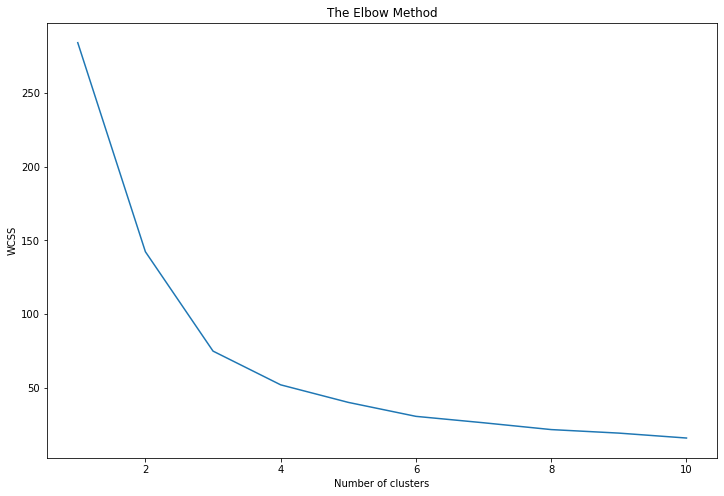

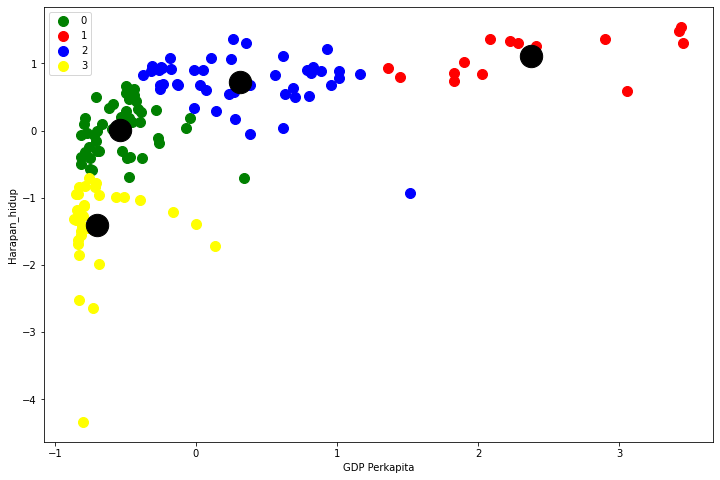

In [686]:
data = country_df[['GDPperkapita', 'Harapan_hidup']]
data.plot(kind='box', subplots=True, layout=(2,2), figsize=(12,10))
plt.show()

def remove_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_final = df[~(df>(Q1-(1.5*IQR))) | (df<(Q3+(1.5*IQR)))]
    
    return df_final

df = remove_outlier(country_df[['GDPperkapita', 'Harapan_hidup']])

df.dropna(axis=0, inplace=True)
df.plot(kind='box', subplots=True, layout=(2,2), figsize=(12,10))
plt.show()

# Scaling Data
sc = StandardScaler()
df_std3 = sc.fit_transform(df)

# KMeans proses
new_df3 = pd.DataFrame(data = df_std3, columns = ['GDPperkapita', 'Harapan_hidup'])

# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(new_df3)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(12,8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# clustering using n_clusters = 4
kmeans2 = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(df_std3)
labels2 = kmeans2.labels_
centers = kmeans2.cluster_centers_
new_df3['label_kmeans2'] = labels2

plt.figure(figsize=(12,8))
plt.scatter(new_df3['GDPperkapita'][new_df3.label_kmeans2 == 0], new_df3['Harapan_hidup'][new_df3.label_kmeans2 == 0], c = 'green', s = 100, label = 0, edgecolors = 'green')
plt.scatter(new_df3['GDPperkapita'][new_df3.label_kmeans2 == 1], new_df3['Harapan_hidup'][new_df3.label_kmeans2 == 1], c = 'red', s = 100, label = 1, edgecolors = 'red')
plt.scatter(new_df3['GDPperkapita'][new_df3.label_kmeans2 == 2], new_df3['Harapan_hidup'][new_df3.label_kmeans2 == 2], c = 'blue', s = 100, label = 2, edgecolors = 'blue')
plt.scatter(new_df3['GDPperkapita'][new_df3.label_kmeans2 == 3], new_df3['Harapan_hidup'][new_df3.label_kmeans2 == 3], c = 'yellow', s = 100, label = 3, edgecolors = 'yellow')



plt.scatter(
    centers[:, 0],
    centers[:, 1],
    c = 'black',
    s = 500
)

plt.xlabel('GDP Perkapita')
plt.ylabel('Harapan_hidup')
plt.legend()
plt.savefig('analisis3.png')
plt.show()

In [687]:
from sklearn.metrics import silhouette_score

print(silhouette_score(df_std3, labels= labels2))

new_df3['label2_kmeans'] = labels2
country_df['K_means_labels'] = pd.Series(labels2).astype('object')

top5_countries = country_df[country_df['K_means_labels'] == 3]
top5_countries = top5_countries.sort_values(by=['GDPperkapita'],ascending=True)[:5].reset_index(drop=True)
top5_countries[['Negara', 'GDPperkapita']]

0.44145107656593696


,Negara,GDPperkapita
0,Burundi,231
1,Madagascar,413
2,Eritrea,482
3,Afghanistan,553
4,Cambodia,786


# Analisa 4: GDPperkapita dan Kesehatan

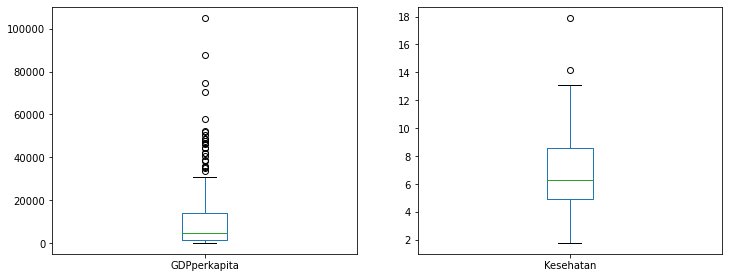

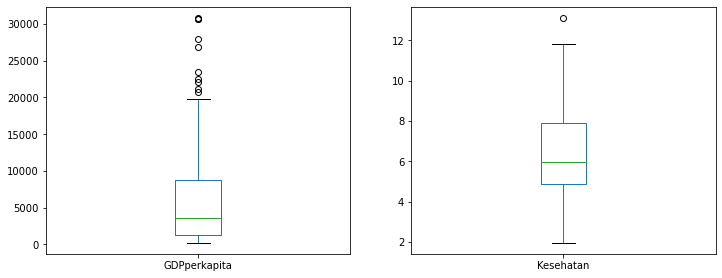

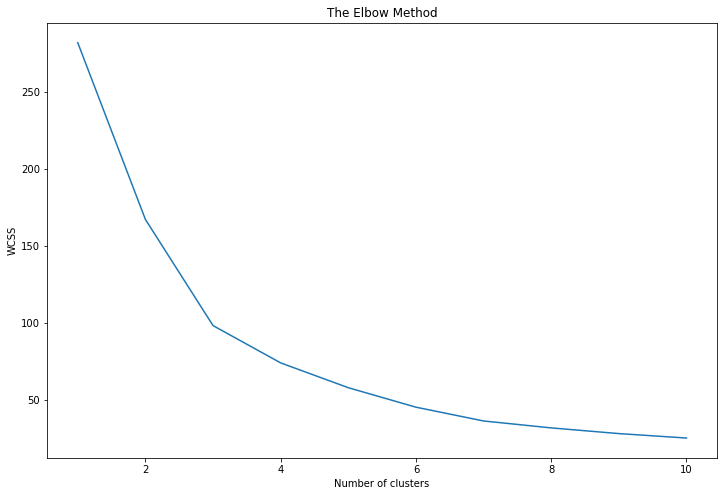

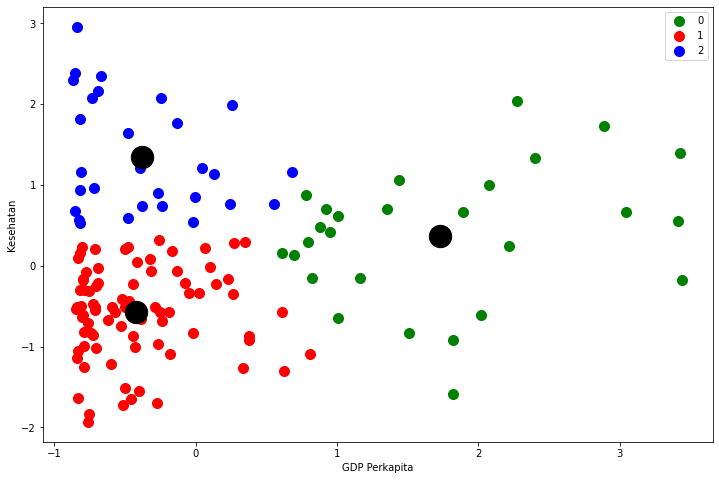

In [688]:
data = country_df[['GDPperkapita', 'Kesehatan']]
data.plot(kind='box', subplots=True, layout=(2,2), figsize=(12,10))
plt.show()

def remove_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_final = df[~(df>(Q1-(1.5*IQR))) | (df<(Q3+(1.5*IQR)))]
    
    return df_final

df = remove_outlier(country_df[['GDPperkapita', 'Kesehatan']])

df.dropna(axis=0, inplace=True)
df.plot(kind='box', subplots=True, layout=(2,2), figsize=(12,10))
plt.show()

# Scaling Data
sc = StandardScaler()
df_std4 = sc.fit_transform(df)

# KMeans proses
new_df4 = pd.DataFrame(data = df_std4, columns = ['GDPperkapita', 'Kesehatan'])

# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(new_df4)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(12,8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# clustering using n_clusters = 3
kmeans2 = KMeans(n_clusters=3, init='k-means++', random_state=42).fit(df_std4)
labels2 = kmeans2.labels_
centers = kmeans2.cluster_centers_
new_df4['label_kmeans2'] = labels2

plt.figure(figsize=(12,8))
plt.scatter(new_df4['GDPperkapita'][new_df4.label_kmeans2 == 0], new_df4['Kesehatan'][new_df4.label_kmeans2 == 0], c = 'green', s = 100, label = 0, edgecolors = 'green')
plt.scatter(new_df4['GDPperkapita'][new_df4.label_kmeans2 == 1], new_df4['Kesehatan'][new_df4.label_kmeans2 == 1], c = 'red', s = 100, label = 1, edgecolors = 'red')
plt.scatter(new_df4['GDPperkapita'][new_df4.label_kmeans2 == 2], new_df4['Kesehatan'][new_df4.label_kmeans2 == 2], c = 'blue', s = 100, label = 2, edgecolors = 'blue')



plt.scatter(
    centers[:, 0],
    centers[:, 1],
    c = 'black',
    s = 500
)

plt.xlabel('GDP Perkapita')
plt.ylabel('Kesehatan')
plt.legend()
plt.savefig('analisis4.png')
plt.show()

In [689]:
from sklearn.metrics import silhouette_score

print(silhouette_score(df_std4, labels= labels2))

new_df4['label2_kmeans'] = labels2
country_df['K_means_labels'] = pd.Series(labels2).astype('object')

top5_countries = country_df[country_df['K_means_labels'] == 2]
top5_countries = top5_countries.sort_values(by=['Kesehatan'],ascending=False)[:5].reset_index(drop=True)
top5_countries[['Negara', 'Kesehatan']]

0.47387520548800216


,Negara,Kesehatan
0,Sierra Leone,13.1
1,Netherlands,11.9
2,Liberia,11.8
3,Rwanda,10.5
4,Iceland,9.4


# Analisa 5: Harapan Hidup dan Pendapatan

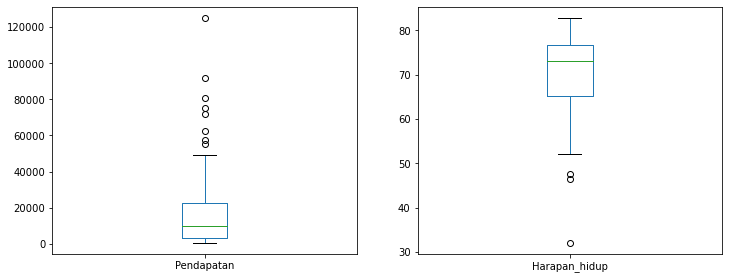

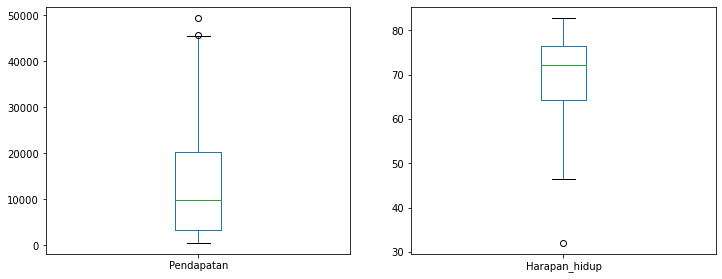

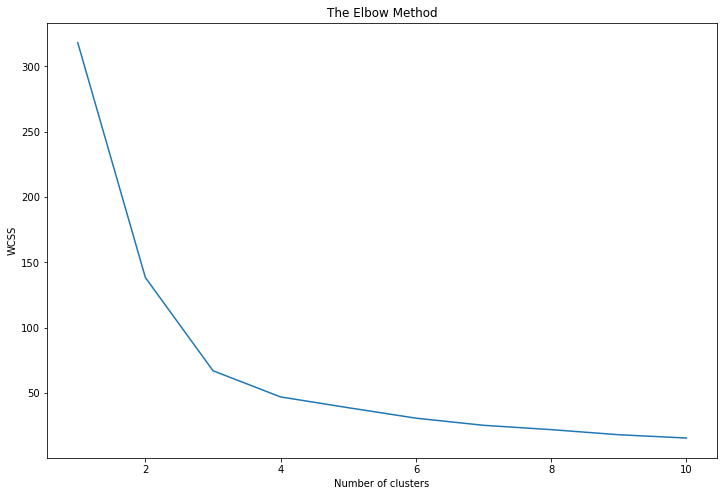

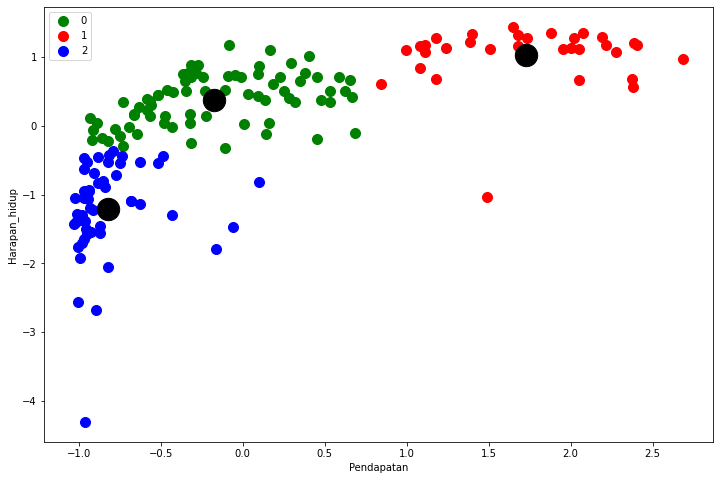

In [690]:
data = country_df[['Pendapatan', 'Harapan_hidup']]
data.plot(kind='box', subplots=True, layout=(2,2), figsize=(12,10))
plt.show()

def remove_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_final = df[~(df>(Q1-(1.5*IQR))) | (df<(Q3+(1.5*IQR)))]
    
    return df_final

df = remove_outlier(country_df[['Pendapatan', 'Harapan_hidup']])

df.dropna(axis=0, inplace=True)
df.plot(kind='box', subplots=True, layout=(2,2), figsize=(12,10))
plt.show()

# Scaling Data
sc = StandardScaler()
df_std5 = sc.fit_transform(df)

# KMeans proses
new_df5 = pd.DataFrame(data = df_std5, columns = ['Pendapatan', 'Harapan_hidup'])

# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(new_df5)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(12,8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# clustering using n_clusters = 3
kmeans2 = KMeans(n_clusters=3, init='k-means++', random_state=42).fit(df_std5)
labels2 = kmeans2.labels_
centers = kmeans2.cluster_centers_
new_df5['label_kmeans2'] = labels2

plt.figure(figsize=(12,8))
plt.scatter(new_df5['Pendapatan'][new_df5.label_kmeans2 == 0], new_df5['Harapan_hidup'][new_df5.label_kmeans2 == 0], c = 'green', s = 100, label = 0, edgecolors = 'green')
plt.scatter(new_df5['Pendapatan'][new_df5.label_kmeans2 == 1], new_df5['Harapan_hidup'][new_df5.label_kmeans2 == 1], c = 'red', s = 100, label = 1, edgecolors = 'red')
plt.scatter(new_df5['Pendapatan'][new_df5.label_kmeans2 == 2], new_df5['Harapan_hidup'][new_df5.label_kmeans2 == 2], c = 'blue', s = 100, label = 2, edgecolors = 'blue')




plt.scatter(
    centers[:, 0],
    centers[:, 1],
    c = 'black',
    s = 500
)

plt.xlabel('Pendapatan')
plt.ylabel('Harapan_hidup')
plt.legend()
plt.savefig('analisis5.png')
plt.show()

In [691]:
from sklearn.metrics import silhouette_score

print(silhouette_score(df_std5, labels= labels2))

new_df5['label2_kmeans'] = labels2
country_df['K_means_labels'] = pd.Series(labels2).astype('object')

top5_countries = country_df[country_df['K_means_labels'] == 2]
top5_countries = top5_countries.sort_values(by=['Pendapatan'],ascending=True)[:5].reset_index(drop=True)
top5_countries[['Negara', 'Pendapatan']]

0.5254366633083457


,Negara,Pendapatan
0,"Congo, Dem. Rep.",609
1,Burundi,764
2,Niger,814
3,Central African Republic,888
4,Malawi,1030
